# Multiple-objective portfolio optimization

# INTRODUCTION

-  Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.
-  Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [1]:
import numpy as np
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Exmple

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [2]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [3]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [4]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [5]:
b = matrix(1.0) 

In [6]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [7]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [8]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [9]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [10]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.875000000000018


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Exmple

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [11]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [12]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [13]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.4999999895543077


# Portfolio optimization

In [14]:
from pathlib import Path
import logging

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from asset import Asset


c:\Users\Jurek\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [15]:
sns.set_theme()


In [16]:
ASSETS_DIR = Path("data/Bundle1/")
ASSETS = [Asset(asset_path) for asset_path in ASSETS_DIR.iterdir() if asset_path.suffix == ".txt"]

In [17]:
asset = ASSETS[4]
asset.name


'CPU-XYZ'

In [18]:
def get_expected_return(asset: Asset, last_no: int = 25, plot: bool = False) -> float:
    X = np.array(list(range(len(asset.data_points)))).reshape(-1, 1)
    y = np.array(asset.data_points)

    # poly = PolynomialFeatures(degree=5, include_bias=False)
    # X_poly = poly.fit_transform(X)

    lin_reg = LinearRegression()
    lin_reg.fit(X[-last_no:], y[-last_no:])
    # lin_reg.fit(X_poly, y)

    # print(f"Mean squared error: {mean_squared_error(y, lin_reg.predict(X))}")

    X_future = np.array(list(range(len(asset.data_points) + last_no))).reshape(-1, 1)
    # X_future_poly = poly.fit_transform(X_future)
    # last_pred = max(lin_reg.predict(X_future_poly)[-1], 0) # Predicted value can't be negative
    last_pred = max(lin_reg.predict(X_future)[-1], 0) # Predicted value can't be negative

    if plot:
        plt.plot(X, y, "b.")
        plt.plot(X_future, lin_reg.predict(X_future), "r-")
        plt.show()

    return round((last_pred - y[-1]) / y[-1], 4)

In [19]:
def format_to_range(expected_results: np.array):
    # Format results to range [-1, 1]
    min_val = min(expected_results)
    max_val = max(expected_results)

    return 2 * (expected_results - min_val) / (max_val - min_val) - 1


def get_expected_return_prophet(asset: Asset, plot: bool = False) -> float:
    m = Prophet()
    data = asset.data_points

    df = pd.DataFrame({"y": data, "ds": pd.date_range("2020-01-01", periods=len(data), freq="D")})

    # Disable prophet and cmdstanpy logging
    logging.getLogger("prophet").setLevel(logging.ERROR)
    logging.getLogger("cmdstanpy").setLevel(logging.ERROR)

    m.fit(df)

    future = m.make_future_dataframe(periods=100)
    forecast = m.predict(future)

    if plot:
        m.plot(forecast)
        plt.show()

    yhat = forecast["yhat"].values[-1]
    yhat_lower = forecast["yhat_lower"].values[-1]
    yhat_upper = forecast["yhat_upper"].values[-1]

    diff = yhat_upper + yhat_lower - 2 * yhat

    last = data[-1]

    return round((yhat + diff - last) / last, 4)

In [20]:
expected_results = []
for asset in ASSETS:
    # expected_results.append(get_expected_return(asset, last_no=50))
    expected_results.append(get_expected_return_prophet(asset))

expected_results = format_to_range(np.array(expected_results))
expected_results


array([ 0.92493982,  0.5378894 , -1.        ,  0.10657181,  0.54428515,
       -0.1523481 ,  0.49667637,  0.63993389,  0.68854874,  0.89213467,
        0.93977938,  0.45787072,  0.33218354,  0.61880637,  0.46976393,
        0.5379972 ,  0.85372426,  1.        ,  0.63339442,  0.90014732])

In [21]:
ASSETS_MATRIX = np.array([ASSETS[i].data_points for i in range(20)]) 

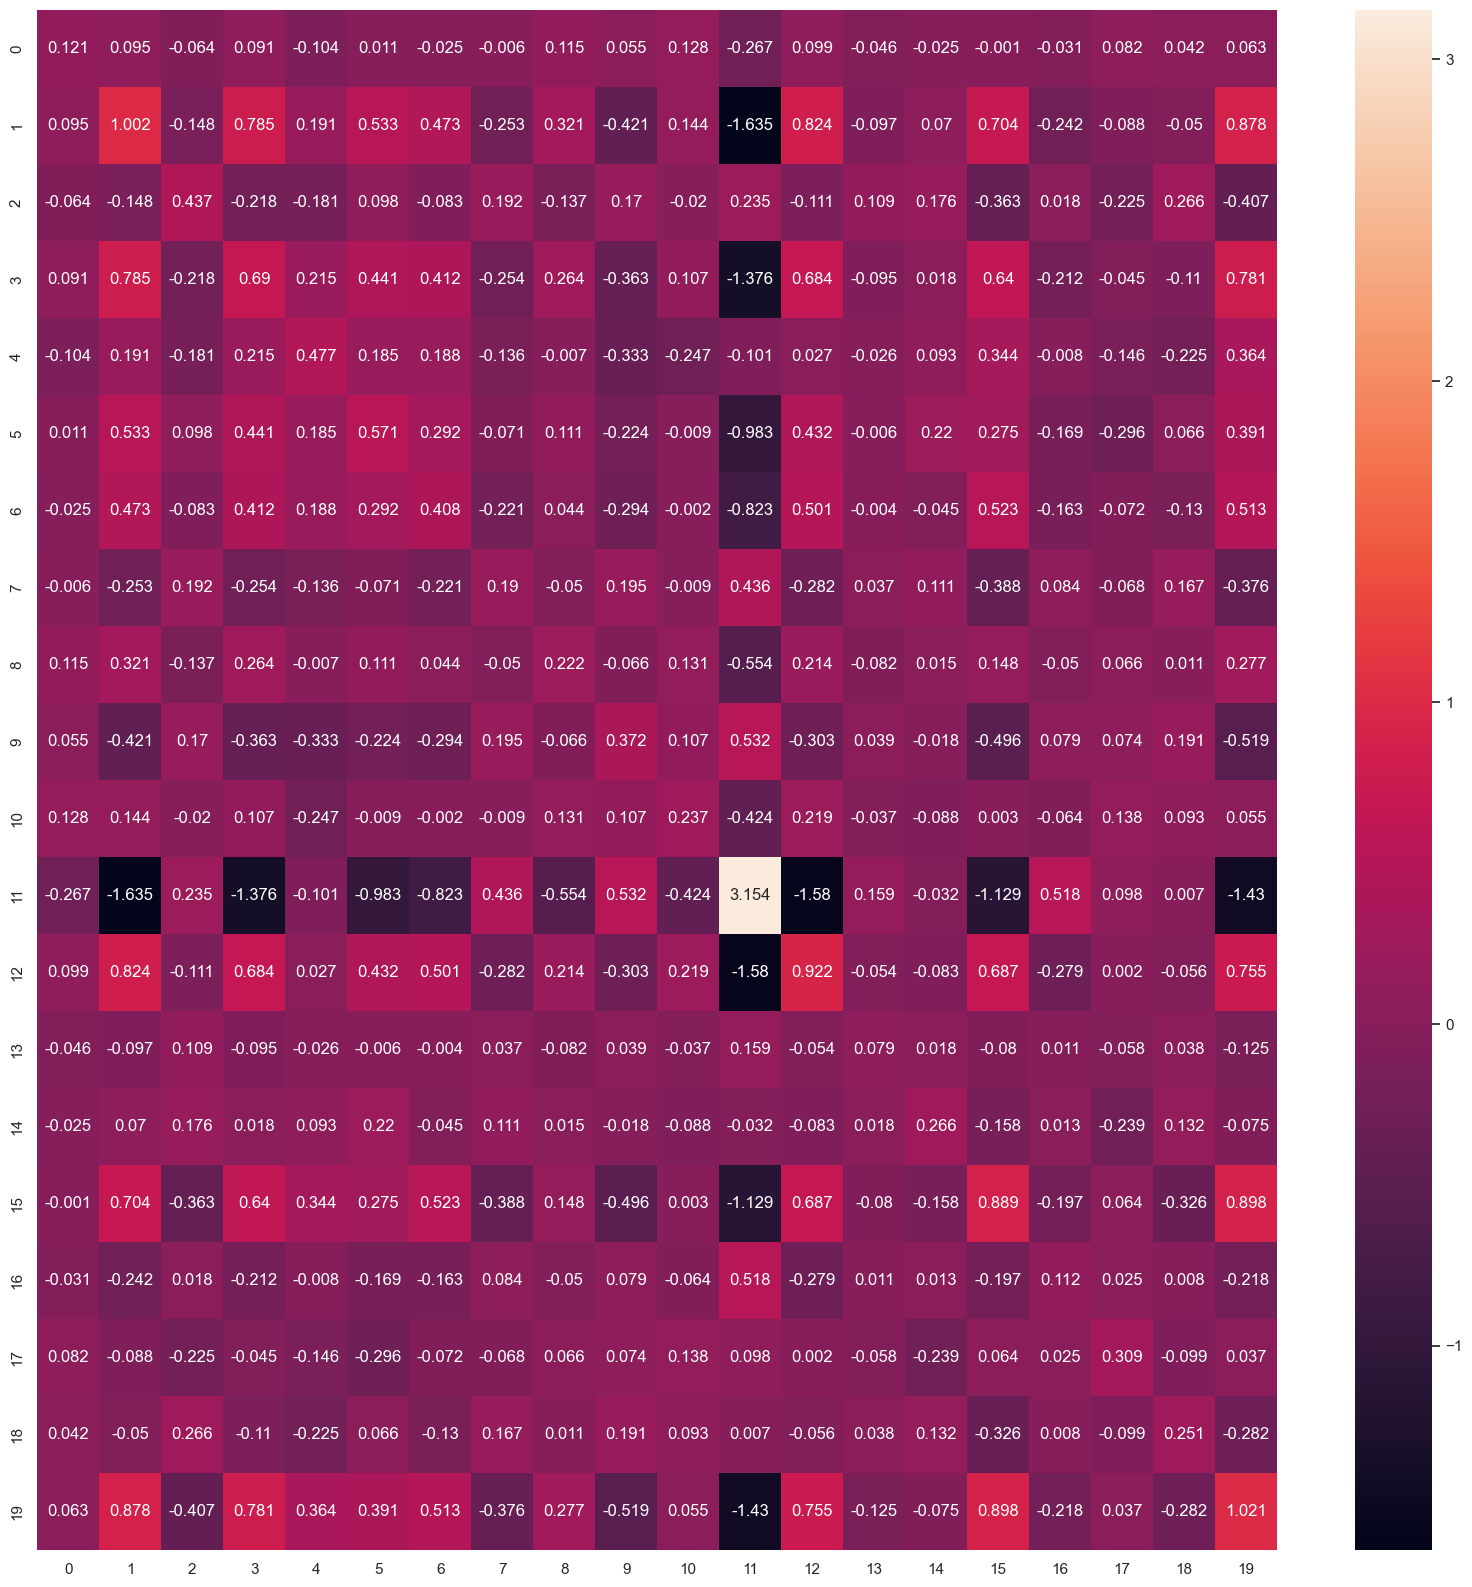

In [22]:
cov_matrix = np.round(np.cov(ASSETS_MATRIX, bias=True), 3)
plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [23]:
# A = matrix([1, 1, ..., 1]) (1x20)
# b = matrix([1, 1, ..., 1]) (20x1)

# G = -I (20x20)
# h = matrix([0, 0, ..., 0]) (20x1)

# c = Return (20x1)
# Q = Covariance (20x20)

In [24]:
A = matrix(np.ones(20)).T
b = matrix(1.0)

G = matrix(-np.eye(20))
h = matrix(np.zeros(20))

c = matrix(-expected_results)
Q = matrix(cov_matrix)

In [25]:
solQP = solvers.qp(Q, c, G, h, A, b)


     pcost       dcost       gap    pres   dres
 0: -3.0092e+00 -2.1248e+00  5e+01  9e+00  2e+00
 1: -9.5822e-01 -1.8283e+00  3e+00  3e-01  7e-02
 2: -7.6789e-01 -1.1397e+00  4e-01  7e-16  8e-16
 3: -8.4956e-01 -9.1035e-01  6e-02  8e-17  4e-16
 4: -8.8696e-01 -8.9517e-01  8e-03  9e-17  2e-16
 5: -8.9324e-01 -8.9362e-01  4e-04  1e-16  3e-16
 6: -8.9350e-01 -8.9351e-01  9e-06  1e-17  2e-16
 7: -8.9350e-01 -8.9350e-01  9e-08  1e-16  3e-16
Optimal solution found.


In [26]:
arr = np.array(solQP['x'])
arr_round = np.round(arr, 5)

# print("Invest in:")
invest = []
for ind, elem in enumerate(arr_round):
    elem, = elem
    if elem < 0.0001:
        continue

    # print(f"{ind:2} - {ASSETS[ind].name:12}: {elem}")
    invest.append((ind, elem))

print("Primal objective:", solQP['primal objective'])
print(f"Number of assets to invest in: {len(invest)}")

Primal objective: -0.8935042717595818
Number of assets to invest in: 5


Invest in:
-----------------

 0 - ABCDE       : 0.31592


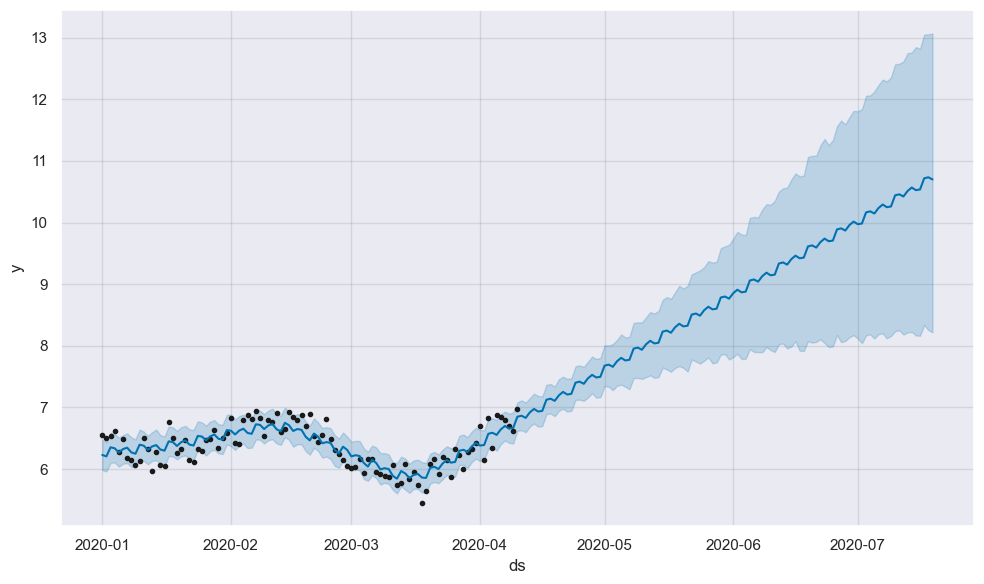

 9 - MarsProject : 0.09218


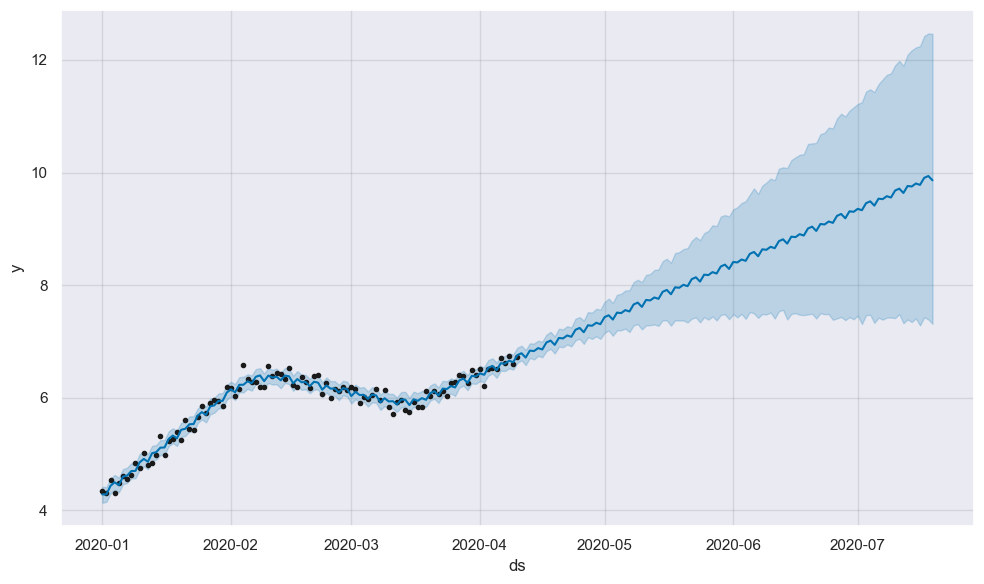

16 - SpaceNow    : 0.14649


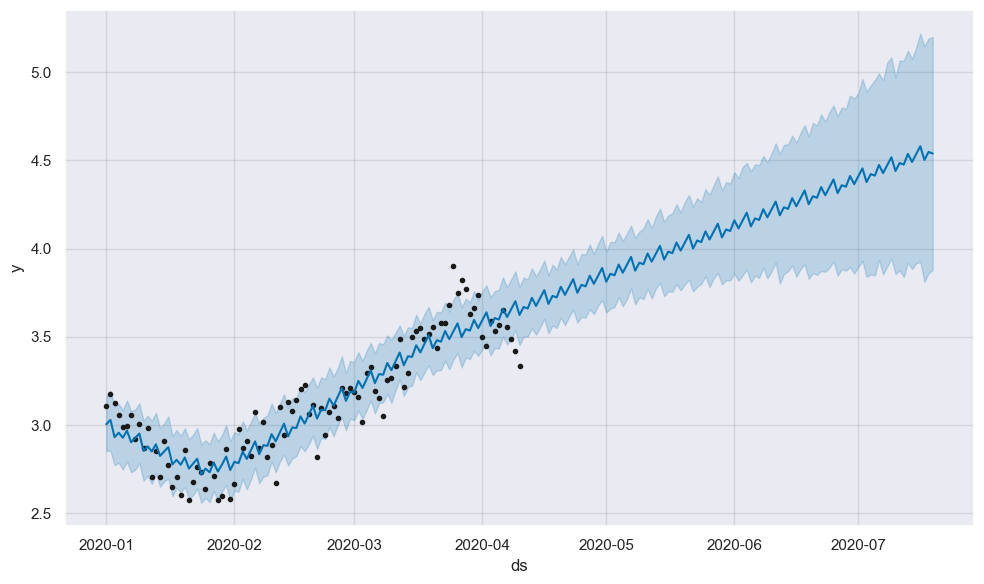

17 - SuperFuture : 0.35181


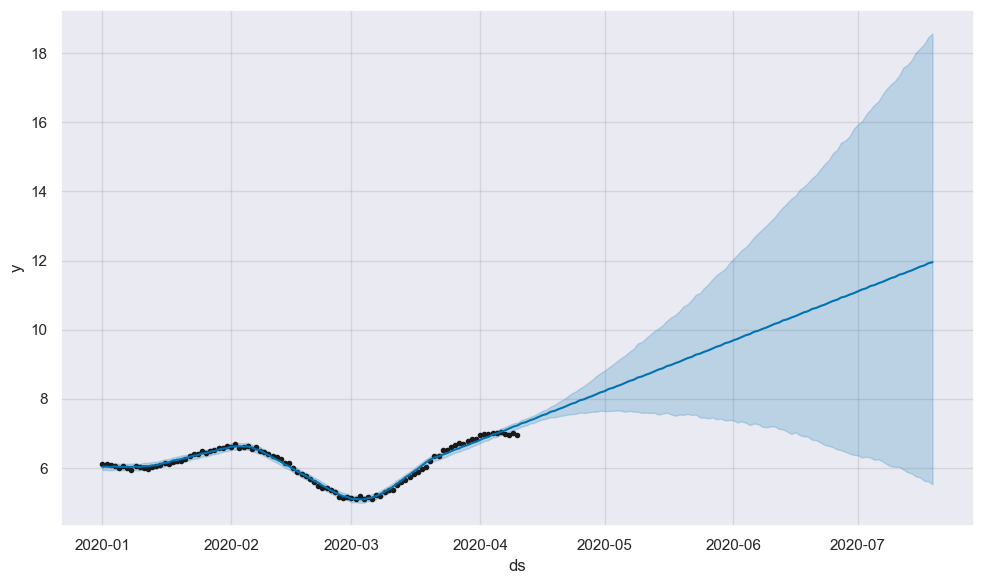

19 - WorldNow    : 0.0936


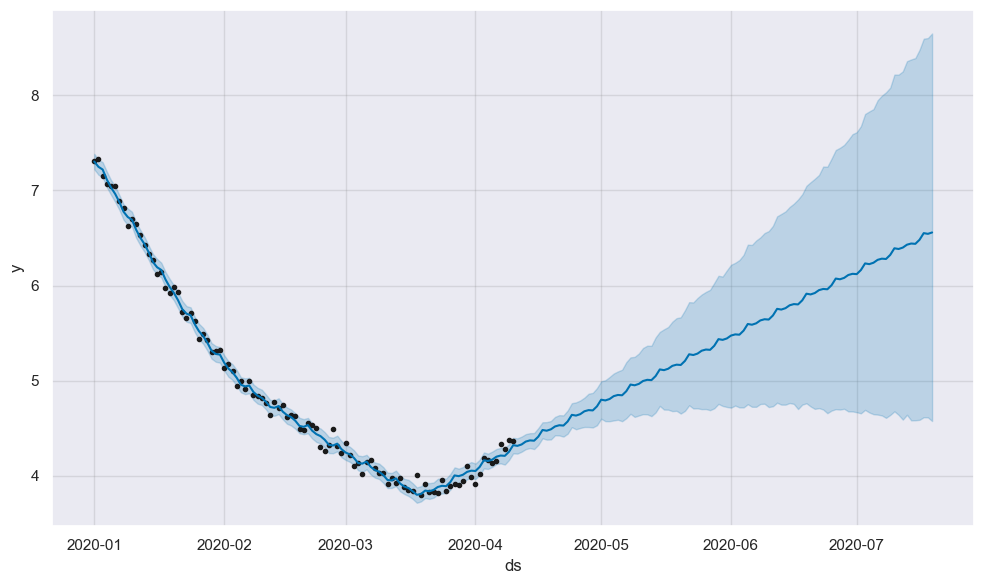

In [27]:
print("Invest in:\n-----------------\n")
for ind, elem in invest:
    print(f"{ind:2} - {ASSETS[ind].name:12}: {elem}")
    _ = get_expected_return_prophet(ASSETS[ind], plot=True)

# Weighted Sum Method

In [ ]:
A = matrix(np.ones(20)).T
b = matrix(1.0)

G = matrix(-np.eye(20))
h = matrix(np.zeros(20))

c = matrix(-expected_results)
Q = matrix(cov_matrix)

In [ ]:
solQP = solvers.qp(Q, c, G, h, A, b)

In [38]:
weights1 = [[1/j, 1 - 1/j] for j in range(1,10)]
weights2 = [[1 - 1/j, 1/j] for j in range(1,10)]
weights = weights1+weights2
weights

[[1.0, 0.0],
 [0.5, 0.5],
 [0.3333333333333333, 0.6666666666666667],
 [0.25, 0.75],
 [0.2, 0.8],
 [0.16666666666666666, 0.8333333333333334],
 [0.14285714285714285, 0.8571428571428572],
 [0.125, 0.875],
 [0.1111111111111111, 0.8888888888888888],
 [0.0, 1.0],
 [0.5, 0.5],
 [0.6666666666666667, 0.3333333333333333],
 [0.75, 0.25],
 [0.8, 0.2],
 [0.8333333333333334, 0.16666666666666666],
 [0.8571428571428572, 0.14285714285714285],
 [0.875, 0.125],
 [0.8888888888888888, 0.1111111111111111]]

In [45]:
for w in weights:
    wc, wq = w
    print("c weight:",wc,"Q weight:", wq)
    A = matrix(np.ones(20)).T
    b = matrix(1.0)

    G = matrix(-np.eye(20))
    h = matrix(np.zeros(20))

    c = wc * matrix(-expected_results)
    Q = wq * matrix(cov_matrix)

    solQP = solvers.qp(Q, c, G, h, A, b)
    arr = np.array(solQP['x'])
    arr_round = np.round(arr, 5)

    # print("Invest in:")
    invest = []
    for ind, elem in enumerate(arr_round):
        elem, = elem
        if elem < 0.0001:
            continue

        # print(f"{ind:2} - {ASSETS[ind].name:12}: {elem}")
        invest.append((ind, elem))

    print("Primal objective:", solQP['primal objective'])
    print(f"Number of assets to invest in: {len(invest)}")

    print("Invest in:\n-----------------\n")
    for ind, elem in invest:
        print(f"{ind:2} - {ASSETS[ind].name:12}: {elem}")
        _ = get_expected_return_prophet(ASSETS[ind], plot=False)


    print("<------------------------->")

c weight: 1.0 Q weight: 0.0
     pcost       dcost       gap    pres   dres
 0: -4.5283e+00 -2.0000e+00  7e+01  1e+01  2e+00
 1: -6.7341e-01 -1.9478e+00  1e+00  1e-02  3e-03
 2: -7.4379e-01 -1.0095e+00  3e-01  3e-03  6e-04
 3: -8.5056e-01 -1.0779e+00  2e-01  2e-03  4e-04
 4: -9.9559e-01 -1.0034e+00  8e-03  2e-05  5e-06
 5: -9.9995e-01 -1.0000e+00  8e-05  2e-07  5e-08
 6: -1.0000e+00 -1.0000e+00  8e-07  2e-09  5e-10
Optimal solution found.
Primal objective: -0.9999995465102595
Number of assets to invest in: 1
Invest in:
-----------------

17 - SuperFuture : 1.0
<------------------------->
c weight: 0.5 Q weight: 0.5
     pcost       dcost       gap    pres   dres
 0: -9.9631e-01 -1.4941e+00  4e+01  7e+00  4e+00
 1: -3.5858e-01 -1.3658e+00  1e+00  5e-02  2e-02
 2: -3.6661e-01 -4.8448e-01  1e-01  4e-03  2e-03
 3: -4.3261e-01 -4.6787e-01  4e-02  2e-16  3e-16
 4: -4.4469e-01 -4.4908e-01  4e-03  7e-17  3e-16
 5: -4.4658e-01 -4.4684e-01  3e-04  2e-16  3e-16
 6: -4.4675e-01 -4.4675e-01  7e-06 

# Epsilon-constrained method